In [614]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

## STEP1: Gaussian Blurring

In [622]:
def gaussian_kernel(size: int, sigma: float)->np.array:
    """This function returns 2-dimentional gaussian kernel
    
    Parameters
    ----------
    size : int, size of the kernel in square
    sigma : float, standard derivation in gaussian distribution function

    Returns
    -------
    out : np.array, shape = (size, size)
          an np.array with centered gaussian kernel
    """
    x = np.linspace(- (size // 2), size // 2, size)
    gaussian = np.exp(-np.square(x)/(2.*np.square(sigma)))
    gaussian_2d = np.outer(gaussian, gaussian)
    return gaussian_2d / gaussian_2d.sum()

In [623]:

gaussian_kernel(5, 3)

array([[0.0317564 , 0.03751576, 0.03965895, 0.03751576, 0.0317564 ],
       [0.03751576, 0.04431963, 0.04685151, 0.04431963, 0.03751576],
       [0.03965895, 0.04685151, 0.04952803, 0.04685151, 0.03965895],
       [0.03751576, 0.04431963, 0.04685151, 0.04431963, 0.03751576],
       [0.0317564 , 0.03751576, 0.03965895, 0.03751576, 0.0317564 ]])

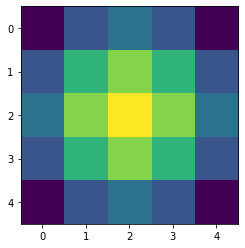

In [624]:
plt.imshow(gaussian_kernel(5,2), interpolation='none')

## STEP2: Gradient Magnitude

In [635]:
def convolution(image, filter):
    kernel = np.flipud(np.fliplr(filter))
    sub_matrices = np.lib.stride_tricks.as_strided(image,
                                                   shape=tuple(np.subtract(image.shape, kernel.shape)+1)+kernel.shape,
                                                   strides=image.strides*2)
    return np.einsum('ij,klij->kl', kernel, sub_matrices)
    
    

In [636]:
def grad_mag(image):
    _x = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    _y = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    g_x = convolution(image, _x)
    g_y = convolution(image, _y)
    res = np.sqrt(g_x**2 + g_y**2)
    res2 = np.linalg.norm(np.array([g_x,g_y]), axis=(0))
    # res3 = np.sqrt(np.einsum('ij,ij->ijk', g_x, g_y))
    return res


In [637]:
q=grad_mag(gray)

In [638]:
q.shape

(648, 978)

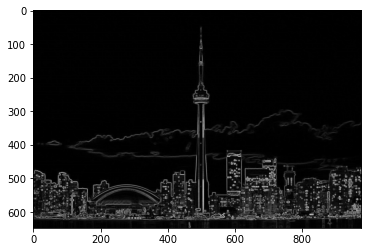

In [639]:
plt.imshow(q, cmap='gray')

In [640]:
def threshold(grad_image, epsilon=0.1):
    # i_t = np.einsum('ij->t', grad_image)/(grad_image.shape[0]*grad_image.shape[1])
    i_t = grad_image.mean()
    i_t_new = float('inf')
    while np.abs(i_t- i_t_new) > epsilon:
        i_t_new  = i_t
        l_class = grad_image.mean(where=grad_image < i_t_new)
        u_class = grad_image.mean(where=grad_image >= i_t_new)
        i_t = (l_class + u_class)/2

    map_func = np.vectorize(lambda x:255 if x > i_t else 0)
    result = map_func(grad_image)
    return result

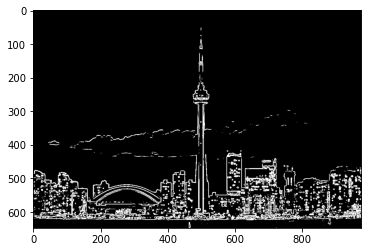

In [641]:
x = threshold(q)
plt.imshow(x, cmap='gray')